In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("cleandata.csv")

In [4]:
df_plot = df[['country_long', 'fuel1', 'capacity_mw']]

In [5]:
top_fuels = df_plot['fuel1'].value_counts().nlargest(4).index.tolist()

In [6]:
df_top = df_plot[df_plot['fuel1'].isin(top_fuels)]

In [7]:
fuel_capacity_by_country = df_top.groupby(['country_long', 'fuel1'])['capacity_mw'].sum().unstack(fill_value=0)

In [8]:
fuel_capacity_by_country = fuel_capacity_by_country[fuel_capacity_by_country.sum(axis=1) > 1000]

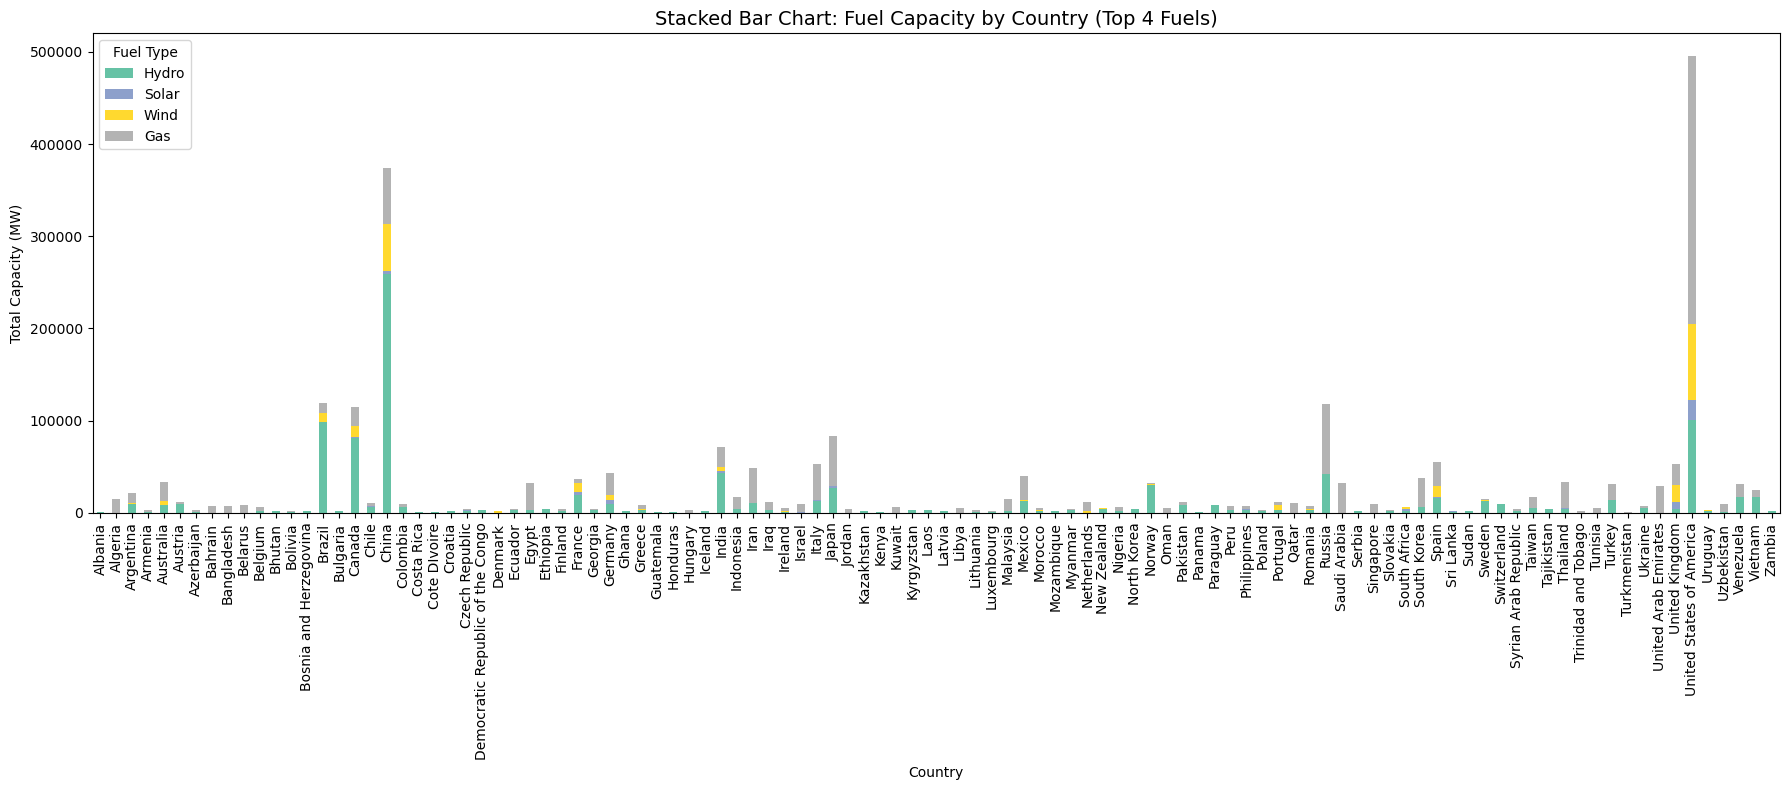

In [9]:
fuel_capacity_by_country[top_fuels].plot(
    kind='bar',
    stacked=True,
    figsize=(18, 8),
    colormap='Set2'
)

plt.title('Stacked Bar Chart: Fuel Capacity by Country (Top 4 Fuels)', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Total Capacity (MW)')
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()

In [10]:
#a Horizontal Bar Chart showing the number of plants per country.
plant_count_by_country = df['country_long'].value_counts().sort_values(ascending=True)

In [11]:

plant_count_by_country = df['country_long'].value_counts().head(20)

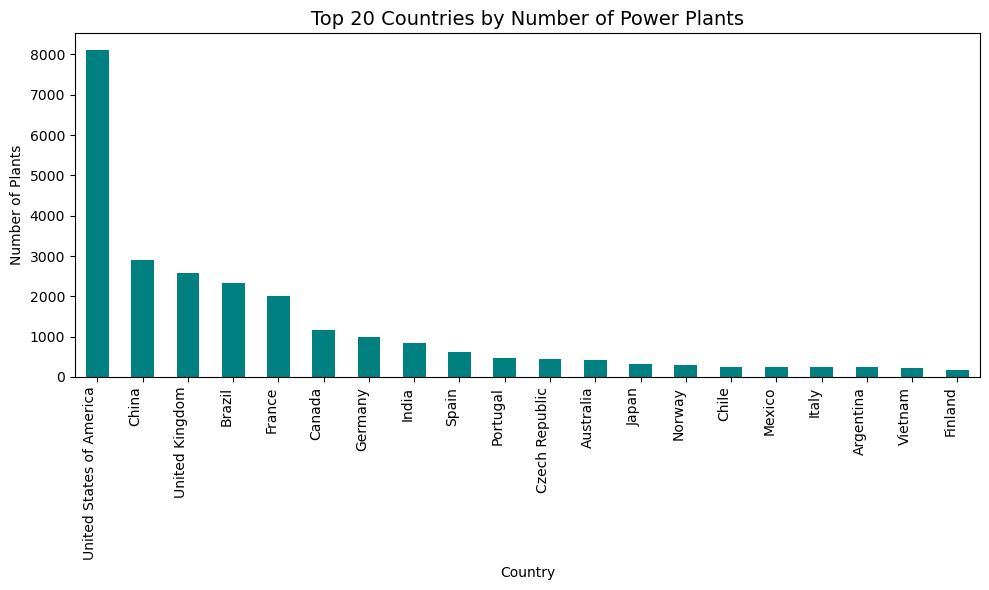

In [12]:
plt.figure(figsize=(10, 6))
plant_count_by_country.plot(kind='bar', color='teal')
plt.title('Top 20 Countries by Number of Power Plants', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Number of Plants')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


In [13]:
#a Pie Chart of the Top 20 Fuel Types Globally based on their usage
fuel_counts = df['fuel1'].value_counts().head(10)

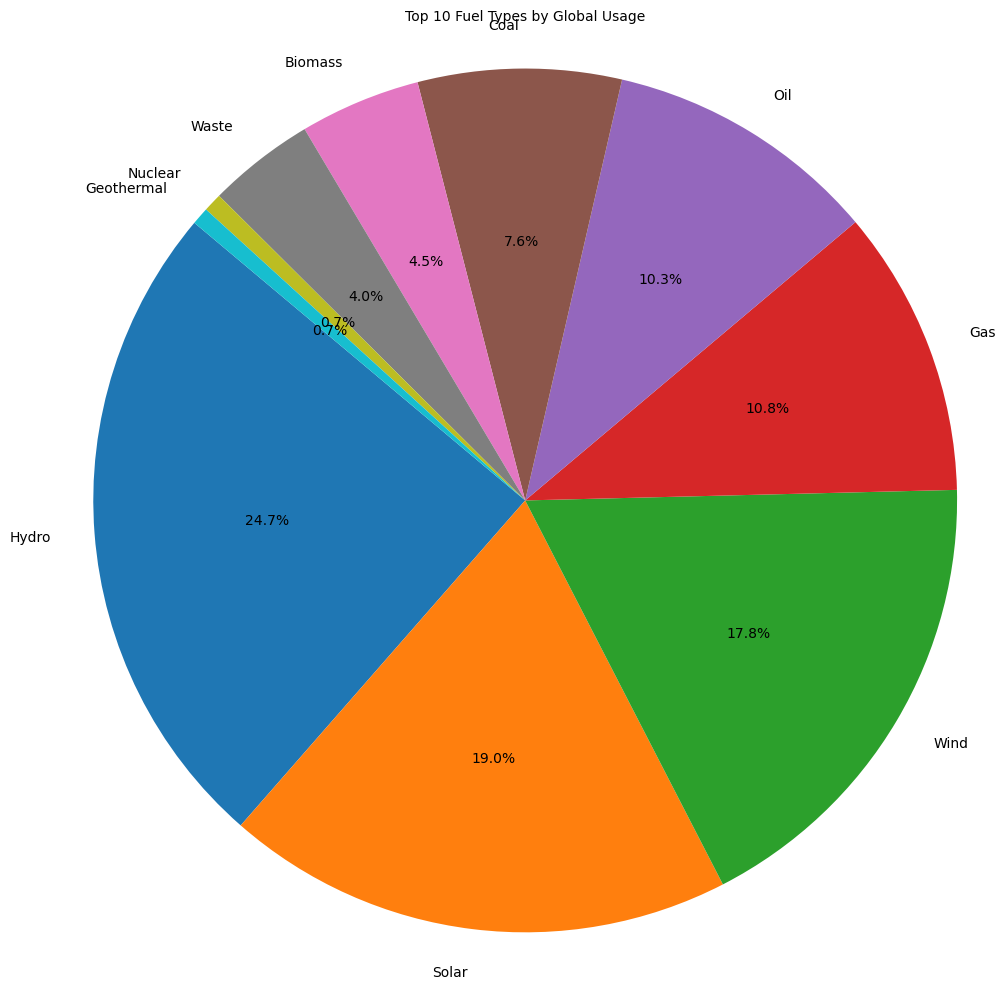

In [14]:
plt.figure(figsize=(10, 10))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Fuel Types by Global Usage', fontsize=10)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Number of Plants Commissioned Per Year'}, xlabel='commissioning_year'>

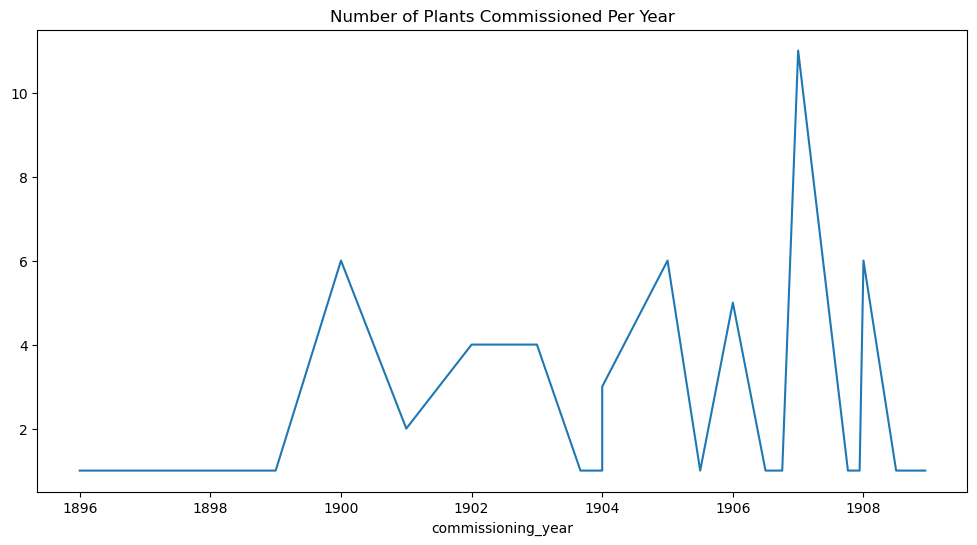

In [15]:
df['commissioning_year'] = pd.to_numeric(df['commissioning_year'], errors='coerce')
plants_per_year = df['commissioning_year'].value_counts().sort_index().head(20)
plants_per_year.plot(kind='line', figsize=(12,6), title='Number of Plants Commissioned Per Year')


<Axes: title={'center': 'Top 20 Countries by Power Capacity (MW)'}, xlabel='country_long'>

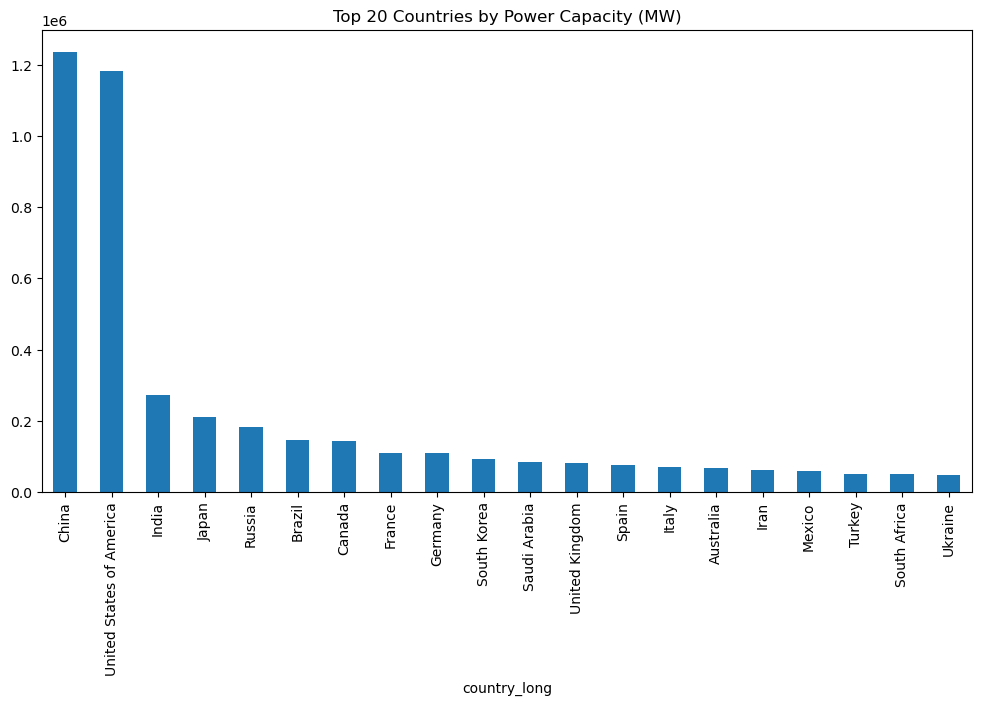

In [16]:
country_capacity = df.groupby('country_long')['capacity_mw'].sum().sort_values(ascending=False)
country_capacity.head(20).plot(kind='bar', figsize=(12,6), title='Top 20 Countries by Power Capacity (MW)')


In [17]:
country_capacity.head(10)


country_long
China                       1.237478e+06
United States of America    1.183856e+06
India                       2.730301e+05
Japan                       2.105948e+05
Russia                      1.827520e+05
Brazil                      1.457885e+05
Canada                      1.434552e+05
France                      1.093333e+05
Germany                     1.084298e+05
South Korea                 9.339178e+04
Name: capacity_mw, dtype: float64

In [18]:
plant_count_by_country


country_long
United States of America    8119
China                       2901
United Kingdom              2567
Brazil                      2340
France                      2018
Canada                      1154
Germany                      980
India                        845
Spain                        613
Portugal                     462
Czech Republic               450
Australia                    419
Japan                        325
Norway                       306
Chile                        253
Mexico                       251
Italy                        247
Argentina                    241
Vietnam                      219
Finland                      184
Name: count, dtype: int64

In [19]:
plants_per_year.head(10)

commissioning_year
1896.000000    1
1899.000000    1
1900.000000    6
1901.000000    2
1902.000000    4
1903.000000    4
1903.666667    1
1904.000000    1
1904.000000    3
1905.000000    6
Name: count, dtype: int64